In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [6]:
df = pd.read_csv(r"C:\Users\abhin\Downloads\week 4 - Nashville_housing_data.csv")

In [24]:
df

,Land_Use,Sold_As_Vacant,Multiple_Parcels_Involved_in_Sale,Acreage,Tax_District,Neighborhood,Land_Value,Building_Value,Finished_Area,Foundation_Type,Year_Built,Exterior_Wall,Grade,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value
0,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,1
1,SINGLE FAMILY,No,No,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,1
2,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,0
3,SINGLE FAMILY,No,No,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,0
4,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,No,No,0.38,URBAN SERVICES DISTRICT,6328,25000,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,1
22647,SINGLE FAMILY,No,No,0.27,URBAN SERVICES DISTRICT,6328,25000,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,1
22648,SINGLE FAMILY,No,No,0.23,URBAN SERVICES DISTRICT,6328,25000,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,1
22649,SINGLE FAMILY,No,No,0.15,URBAN SERVICES DISTRICT,126,40000,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,1


In [8]:
df.columns = ['Unnamed: 0', 'Parcel_ID', 'Land_Use', 'Property_Address',
       'Suite/Condo', 'Property_City', 'Sale_Date', 'Legal_Reference',
       'Sold_As_Vacant', 'Multiple_Parcels_Involved_in_Sale', 'City', 'State',
       'Acreage', 'Tax_District', 'Neighborhood', 'Land_Value',
       'Building_Value', 'Finished_Area', 'Foundation_Type', 'Year_Built',
       'Exterior_Wall', 'Grade', 'Bedrooms', 'Full_Bath', 'Half_Bath',
       'Sale_Price_Compared_To_Value']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel_ID                          22651 non-null  object 
 2   Land_Use                           22651 non-null  object 
 3   Property_Address                   22649 non-null  object 
 4   Suite/Condo                        0 non-null      float64
 5   Property_City                      22649 non-null  object 
 6   Sale_Date                          22651 non-null  object 
 7   Legal_Reference                    22651 non-null  object 
 8   Sold_As_Vacant                     22651 non-null  object 
 9   Multiple_Parcels_Involved_in_Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [10]:
df = df.drop('Suite/Condo',axis = 1)
df = df.drop(columns=['Property_City','City','Legal_Reference','State'], axis = 1)

In [11]:
df = pd.DataFrame(df)

In [12]:
print('sum of duplicated values: {}'.format(df.duplicated().sum()))

sum of duplicated values: 0


In [13]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: Unnamed: 0                             0
Parcel_ID                              0
Land_Use                               0
Property_Address                       2
Sale_Date                              0
Sold_As_Vacant                         0
Multiple_Parcels_Involved_in_Sale      0
Acreage                                0
Tax_District                           0
Neighborhood                           0
Land_Value                             0
Building_Value                         0
Finished_Area                          1
Foundation_Type                        1
Year_Built                             0
Exterior_Wall                          0
Grade                                  0
Bedrooms                               3
Full_Bath                              1
Half_Bath                            108
Sale_Price_Compared_To_Value           0
dtype: int64


In [14]:
df = df.dropna(how = 'any')

In [15]:
df[sales]

NameError: name 'sales' is not defined

In [16]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: Unnamed: 0                           0
Parcel_ID                            0
Land_Use                             0
Property_Address                     0
Sale_Date                            0
Sold_As_Vacant                       0
Multiple_Parcels_Involved_in_Sale    0
Acreage                              0
Tax_District                         0
Neighborhood                         0
Land_Value                           0
Building_Value                       0
Finished_Area                        0
Foundation_Type                      0
Year_Built                           0
Exterior_Wall                        0
Grade                                0
Bedrooms                             0
Full_Bath                            0
Half_Bath                            0
Sale_Price_Compared_To_Value         0
dtype: int64


In [17]:
df = df.drop(columns=(['Unnamed: 0','Parcel_ID','Sale_Date','Property_Address']),axis =1)

In [18]:
cor = df.corr()

<AxesSubplot:>

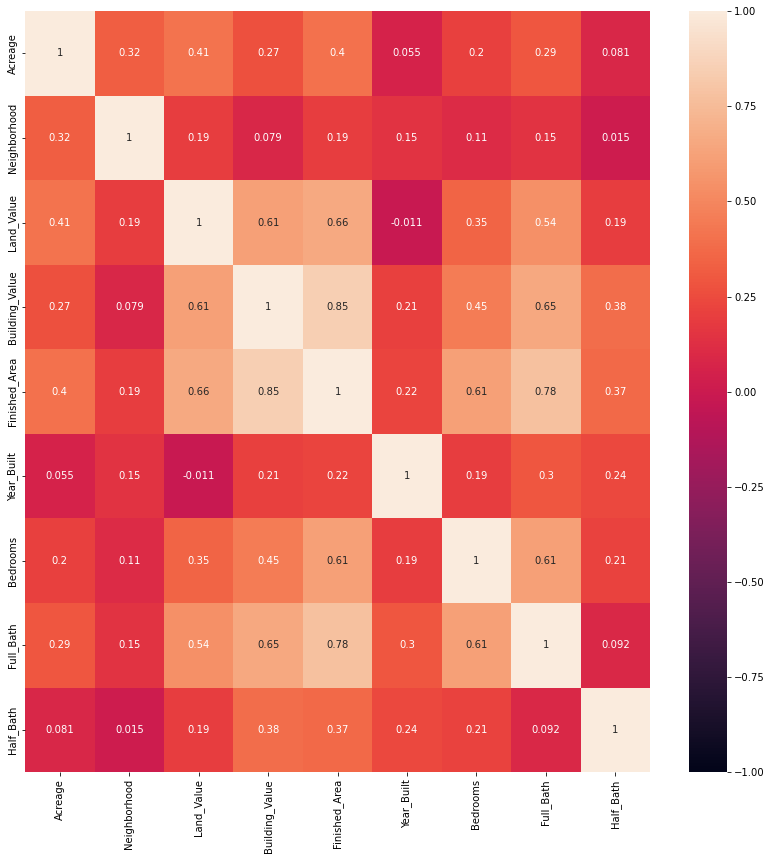

In [19]:
plt.figure(figsize=((14,14)))
sns.heatmap(cor,annot=True, vmin=-1, vmax=1)

In [20]:
df['Sale_Price_Compared_To_Value']=df['Sale_Price_Compared_To_Value'].replace("Under",0).replace("Over",1) 

In [21]:
df_n = pd.get_dummies(df,columns=['Land_Use','Sold_As_Vacant','Multiple_Parcels_Involved_in_Sale','Tax_District','Exterior_Wall','Grade','Foundation_Type'])

In [25]:
df_n.shape

(22536, 48)

In [23]:
df_n['Sale_Price_Compared_To_Value'].value_counts()

1    16979
0     5557
Name: Sale_Price_Compared_To_Value, dtype: int64

In [63]:
y=df_n['Sale_Price_Compared_To_Value']
x=df_n.drop('Sale_Price_Compared_To_Value',axis=1) 

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=123)

In [65]:
reg = LogisticRegression()
model=reg.fit(x_train,y_train)

In [66]:
pred= model.predict(x_test)
print('Accuracy of the model is:{:.5f}'.format(model.score(x_test, y_test)))

Accuracy of the model is:0.75891


In [67]:
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Precision: 0.7594353640416047
Recall: 0.9978524014057009


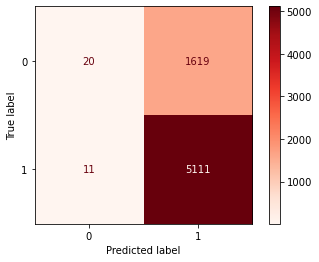

In [68]:
plot_confusion_matrix(reg,x_test, y_test,cmap='Reds')  
plt.show()

In [69]:
decisiontree_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
decisiontree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [70]:
pred_decisiontree = decisiontree_model.predict(x_test)

In [71]:
accuracy_dt = accuracy_score(y_test,pred_decisiontree)
accuracy_dt

0.7649755953261352

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_decisiontree))
print(classification_report(y_test, pred_decisiontree))

[[  73 1566]
 [  23 5099]]
              precision    recall  f1-score   support

           0       0.76      0.04      0.08      1639
           1       0.77      1.00      0.87      5122

    accuracy                           0.76      6761
   macro avg       0.76      0.52      0.47      6761
weighted avg       0.76      0.76      0.68      6761



[Text(331.3125, 733.86, 'X[13] <= 0.5\ngini = 0.373\nsamples = 15775\nvalue = [3918, 11857]'),
 Text(104.625, 570.78, 'X[5] <= 1962.0\ngini = 0.154\nsamples = 95\nvalue = [87, 8]'),
 Text(69.75, 407.70000000000005, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(139.5, 407.70000000000005, 'X[3] <= 739100.0\ngini = 0.086\nsamples = 89\nvalue = [85, 4]'),
 Text(69.75, 244.62, 'X[0] <= 0.095\ngini = 0.05\nsamples = 78\nvalue = [76, 2]'),
 Text(34.875, 81.54000000000008, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(104.625, 81.54000000000008, 'gini = 0.027\nsamples = 73\nvalue = [72, 1]'),
 Text(209.25, 244.62, 'X[0] <= 0.56\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(174.375, 81.54000000000008, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(244.125, 81.54000000000008, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(558.0, 570.78, 'X[3] <= 322350.0\ngini = 0.369\nsamples = 15680\nvalue = [3831, 11849]'),
 Text(418.5, 407.70000000000005, 'X[2] <= 20450.0\ngini = 0.3

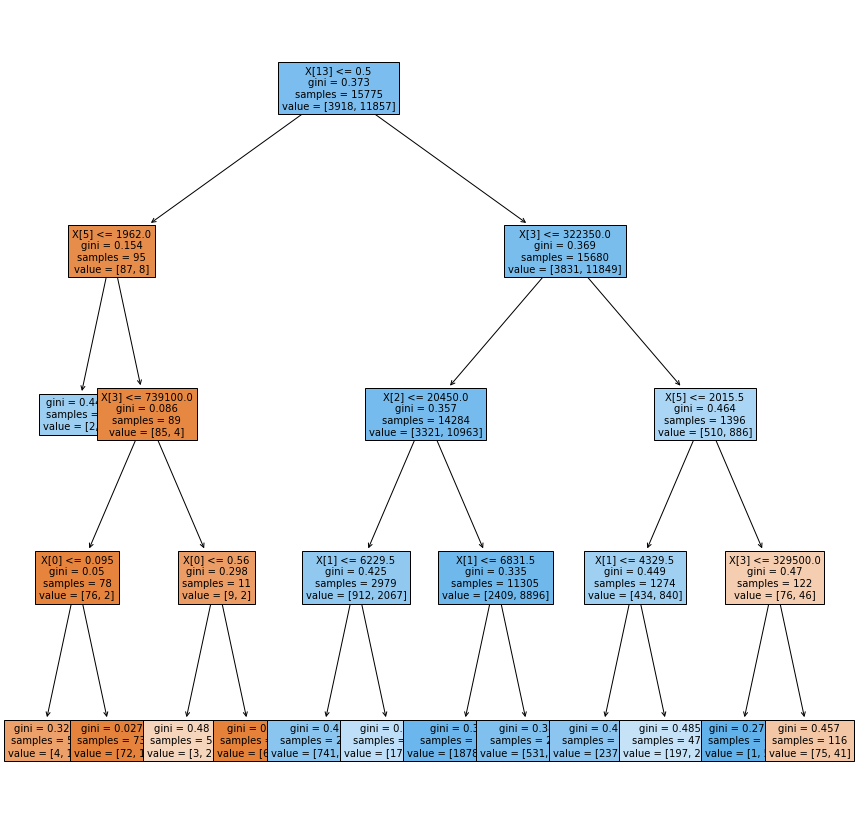

In [76]:
plt.figure(figsize=(15,15))
tree.plot_tree(decisiontree_model, filled= True, fontsize=10)

[(0.0, 0.5), (30.0, 50.0)]

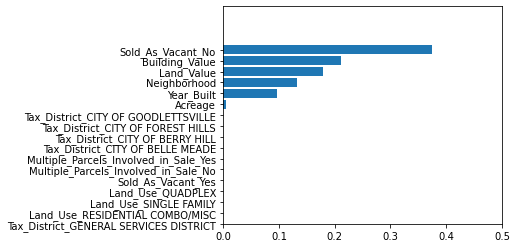

In [74]:
importances_dt = decisiontree_model.feature_importances_

indices = np.argsort(importances_dt)

fig, ax = plt.subplots(figsize=[5, 4])
ax.barh(range(len(importances_dt)), importances_dt[indices])
ax.set_yticks(range(len(importances_dt)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, .50),ylim=(30, 50))

In [28]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(random_state=42,max_depth=4)   
randomforest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [29]:
pred_randomforest = randomforest_model.predict(x_test)
pred_randomforest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
accuracy_rf=accuracy_score(y_test,pred_randomforest)
accuracy_rf

0.7615737316964946

In [31]:
print(confusion_matrix(y_test, pred_randomforest))
print(classification_report(y_test, pred_randomforest))

[[  33 1606]
 [   6 5116]]
              precision    recall  f1-score   support

           0       0.85      0.02      0.04      1639
           1       0.76      1.00      0.86      5122

    accuracy                           0.76      6761
   macro avg       0.80      0.51      0.45      6761
weighted avg       0.78      0.76      0.66      6761



[(0.0, 0.25), (30.0, 50.0)]

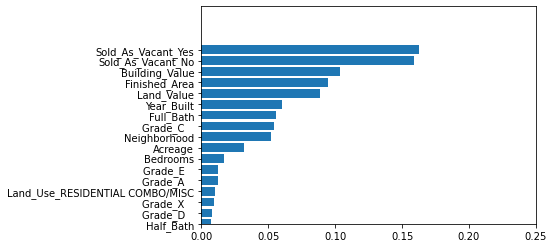

In [75]:
importances_rf = randomforest_model.feature_importances_

indices = np.argsort(importances_rf)

fig, ax = plt.subplots()
ax.barh(range(len(importances_rf)), importances_rf[indices])
ax.set_yticks(range(len(importances_rf)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, .25),ylim=(30, 50))

In [33]:
from sklearn.ensemble import GradientBoostingClassifier


In [34]:
gradientboost_model = GradientBoostingClassifier(random_state=40,max_depth=3)   
gradientboost_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=40)

In [35]:
pred_gradientboost = gradientboost_model.predict(x_test)
accuracy_score(y_test,pred_gradientboost)

0.763348617068481

In [36]:
print(classification_report(y_test, pred_gradientboost))

              precision    recall  f1-score   support

           0       0.63      0.06      0.10      1639
           1       0.77      0.99      0.86      5122

    accuracy                           0.76      6761
   macro avg       0.70      0.52      0.48      6761
weighted avg       0.73      0.76      0.68      6761



[(0.0, 2.0), (30.0, 50.0)]

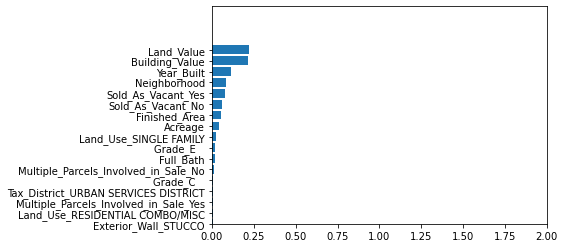

In [37]:
importances_gb = gradientboost_model.feature_importances_

indices = np.argsort(importances_gb)

fig, ax = plt.subplots()
ax.barh(range(len(importances_gb)), importances_gb[indices])
ax.set_yticks(range(len(importances_gb)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, 2),ylim=(30, 50))